In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#metaTdata_dir = '/Users/Cherry/Desktop/Palmer/metaT/p2_100-116.TPM-norm-annotated-lightfiltered.tsv'
metaTdata_dir = '/Users/Cherry/Desktop/Palmer/metaT/p2_100-116.TPM-norm-annotated-full.tsv'

In [3]:
df = pd.read_csv(metaTdata_dir, sep='\t')

/Users/Cherry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,geneID,start,end,length,100_CTD9,20_CTD7,300_CTD14,B_CTD12,100_CTD14,750_CTD14,...,KO,KO_description,EG5_Seed,EG5_KOG,EG5_Category,EG5_Description,EG5_Name,EG5_GOs,LPI_score,LPI_taxonomy
0,0_CTD10_k99_17634_52_447_+,52,447,396,0.11,1.39,0.06,2.02,0.20,3.90,...,K04534,guanine nucleotide-binding protein G(o) subuni...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,Eukaryota;Alveolata;Dinophyta;Dinophyceae;Dino...
1,0_CTD10_k99_5879_2_370_+,2,370,369,2.26,1.63,0.06,0.00,0.03,0.06,...,K02873,large subunit ribosomal protein L13e,227086.JGI_V11_25101,COG4352@1|root;KOG3295@2759|Eukaryota,J,structural constituent of ribosome,RPL13,"GO:0002181,GO:0003674,GO:0003676,GO:0003723,GO...",0.97,Eukaryota;Alveolata;Dinophyta;Dinophyceae;Dino...
2,0_CTD10_k99_23513_1_354_-,1,354,354,0.99,0.00,0.00,0.00,0.00,0.00,...,K02930,large subunit ribosomal protein L4e,29176.XP_003884959.1,COG0088@1|root;KOG1475@2759|Eukaryota,J,ribosomal protein,-,"GO:0002181,GO:0003674,GO:0003676,GO:0003723,GO...",0.93,Eukaryota;Alveolata;Dinophyta;Dinophyceae;Dino...
3,0_CTD10_k99_35267_401_466_+,401,466,66,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0_CTD10_k99_11757_1_345_-,1,345,345,1.08,1.21,1.60,1.16,0.00,2.00,...,NaN,NaN,296587.XP_002500915.1,COG0065@1|root;KOG0454@2759|Eukaryota,E,Aconitate B N-terminal domain,-,-,0.59,Eukaryota;Hacrobia;Cryptophyta;Cryptophyceae;C...


In [5]:
df.info()
#df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344479 entries, 0 to 1344478
Data columns (total 38 columns):
geneID                 1344479 non-null object
start                  1344479 non-null int64
end                    1344479 non-null int64
length                 1344479 non-null int64
100_CTD9               1344479 non-null float64
20_CTD7                1344479 non-null float64
300_CTD14              1344479 non-null float64
B_CTD12                1344479 non-null float64
100_CTD14              1344479 non-null float64
750_CTD14              1344479 non-null float64
M_CTD12                1344479 non-null float64
S_CTD12                1344479 non-null float64
4_CTD7                 1344479 non-null float64
0_CTD9                 1344479 non-null float64
760_CTD7               1344479 non-null float64
20_CTD9                1344479 non-null float64
T_CTD12                1344479 non-null float64
100_CTD7               1344479 non-null float64
0_CTD10                1344479

In [6]:
# extract column names
column_names = df.columns.values.tolist()
print(column_names)

['geneID', 'start', 'end', 'length', '100_CTD9', '20_CTD7', '300_CTD14', 'B_CTD12', '100_CTD14', '750_CTD14', 'M_CTD12', 'S_CTD12', '4_CTD7', '0_CTD9', '760_CTD7', '20_CTD9', 'T_CTD12', '100_CTD7', '0_CTD10', '750_CTD9', '0_CTD14', 'GOterms', 'Pfam', 'Pfam_description', 'TIGRFAM', 'TIGRFAM_description', 'PANTHER', 'PANTHER_description', 'KO', 'KO_description', 'EG5_Seed', 'EG5_KOG', 'EG5_Category', 'EG5_Description', 'EG5_Name', 'EG5_GOs', 'LPI_score', 'LPI_taxonomy']


In [7]:
# column names, sorted alphabetically
column_names_sorted=sorted(df)
print(column_names_sorted)

['0_CTD10', '0_CTD14', '0_CTD9', '100_CTD14', '100_CTD7', '100_CTD9', '20_CTD7', '20_CTD9', '300_CTD14', '4_CTD7', '750_CTD14', '750_CTD9', '760_CTD7', 'B_CTD12', 'EG5_Category', 'EG5_Description', 'EG5_GOs', 'EG5_KOG', 'EG5_Name', 'EG5_Seed', 'GOterms', 'KO', 'KO_description', 'LPI_score', 'LPI_taxonomy', 'M_CTD12', 'PANTHER', 'PANTHER_description', 'Pfam', 'Pfam_description', 'S_CTD12', 'TIGRFAM', 'TIGRFAM_description', 'T_CTD12', 'end', 'geneID', 'length', 'start']


In [9]:
# number of columns
df.shape[1]

38

In [15]:
# look at random row label
i = 610200 # row number

rowname = df.geneID.tolist()[i]
print(rowname)

# split rowname at "k99"
depth = rowname.split("k99")[0]
print(depth)

Mixed_k99_44863_1_477_-
Mixed_


In [16]:
# get CTD number by splitting each rowname by "k99"
# what is "k99" and the number afterwards? 
ctdnum = []
for rowname in df.geneID:
    ctdnum.append([rowname.split("k99")[0]])
ctdnum

[['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10_'],
 ['0_CTD10

In [17]:
# print unique CTD labels
rowname_unique = np.unique(ctdnum)
rowname_unique

array(['0_CTD10_', '0_CTD14_', '0_CTD9_', '100_CTD14_', '100_CTD7_',
       '100_CTD9_', '20_CTD7_', '20_CTD9_', '300_CTD14_', '4_CTD7_',
       '750_CTD14_', '750_CTD9_', '760_CTD7_', 'B_CTD12_', 'Bottom_',
       'M_CTD12_', 'Mixed_', 'S_CTD12_', 'Surface_', 'T_CTD12_',
       'Thermocline_'], dtype='<U12')

In [18]:
# number of rows with CTD number
num_all = []
for row_name in rowname_unique:
    num = ctdnum.count([row_name])
    print(row_name, " : ", num)
    num_all.append(num)

0_CTD10_  :  11994
0_CTD14_  :  29419
0_CTD9_  :  40432
100_CTD14_  :  12732
100_CTD7_  :  20994
100_CTD9_  :  17233
20_CTD7_  :  29060
20_CTD9_  :  26983
300_CTD14_  :  19561
4_CTD7_  :  38309
750_CTD14_  :  16552
750_CTD9_  :  19341
760_CTD7_  :  15998
B_CTD12_  :  18271
Bottom_  :  193365
M_CTD12_  :  16736
Mixed_  :  153613
S_CTD12_  :  8014
Surface_  :  341699
T_CTD12_  :  24055
Thermocline_  :  290118


In [65]:
# double check counts
print(sum(num_all))
print(len(df))

1344479
1344479


In [70]:
ctd_counts = pd.DataFrame({'depth_CTD # labels': rowname_unique, '# of geneID': num_all})
ctd_counts

,depth_CTD # labels,# of geneID
0,0_CTD10_,11994
1,0_CTD14_,29419
2,0_CTD9_,40432
3,100_CTD14_,12732
4,100_CTD7_,20994
5,100_CTD9_,17233
6,20_CTD7_,29060
7,20_CTD9_,26983
8,300_CTD14_,19561
9,4_CTD7_,38309


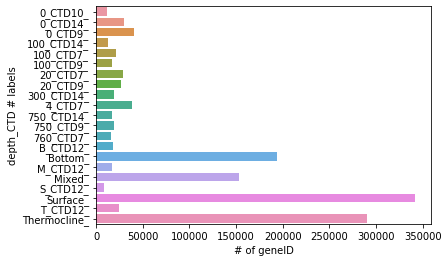

In [71]:

sns.barplot(x = '# of geneID', y = 'depth_CTD # labels',data = ctd_counts)
plt.show()